# ECE 3 : Lab 4

## Warm-Up 

#### (a) For matrix A use the np.sum() function to print:

1. The sum of all its elements
2. The sum of the elements for each one of its columns
3. The sum of the elements for each one of its rows

In [ ]:
# Do not forget to import numpy


A = np.array([[1,2,3], [4 2 1], [6 7 -5]])

# Insert your code below

#### (b) Use the np.bincount() function to print the number of occurences of each value in vector x:


In [ ]:
x = np.array([0, 1, 1, 1, 0, 1])

# Insert your code below

#### (c) Use the np.argsort() function to print the indices that would sort vector x:

1. In ascending order
2. In descending order

In [ ]:
x  = np.array([1, 6, 2, -1, 0])

# Insert your code below


#### (d) Create a function `EvenList(n)` which generates a vector of even numbers from 2 to n (included). The function must return this vector.


In [ ]:
def EvenList(n):

  # Insert your code below
  

# calling the function
print(EvenList(5))    #n=5

IndentationError: ignored

#### (e) Write a function `BoundaryList(A)` which return the maximum and minimum value of the array `A`. The function should return a tuple `(min_val, max_val)`.

In [ ]:
def BoundaryList(A):
  # Insert your code below



# calling the function
print(BoundaryList(np.array([-5,2,0,8,7])))

#### (f) Generate the following pattern :

$
* * * * *\\
* * * *\\
* * *\\
* *\\
*
$


*Hint : You will definitely need for loop(s).*

In [ ]:
# Insert your code below

++ As an exercise, try coding a function which takes `n` as input and prints `n` rows of such a pattern. For example:

GeneratePattern(3) will print:

$* * *\\
* *\\
*$


GeneratePattern(4) will print:

$* * * *\\
* * *\\
* *\\
*$

In [ ]:
# Insert your code below

## Problem 1 - Classification using the k-NN algorithm (synthetic dataset)

### Some introductory ML terminology

In engineering when we study a phenomenon we want to collect data about it and form a **dataset**. We do that by recording some measurable properties of the phenomenon, which we call **features**. The generated dataset consists of a number of **datapoints**, which are the measurements of said features. In some experiments we wish to categorize our data into classes, for that each datapoint is also accompanied by a **label** which indicates to which class it belongs.

### Lemons vs limes

Consider a farmers' co-op that receives mixed batches of lemons and limes from local producers and wants to separate them before distributing them to grocery stores. For that they install a camera system over their conveyor belt, which uses some advanced image processing algorithms and measures the volume and the hue of each fruit. 

They now need an algorithm that will classify the fruit as lemons or limes based on these two features. An engineer proposes that they use a machine learning solution. That means that instead of being explicitly programmed, the algorithm will "learn" a decision rule from a set of initial observations. For this, they measure the volume and the hue of 10 lemons and 10 limes using their camera system and assign the label "0" to lemons and the label "1" to limes.

Because we will use this initial set of observations to train our algorithm, we call it the **training set**. The following block of code simulates the generation of the training set. 

In [2]:
import numpy as np

# for now you don't need to understand how data are generated in this block
np.random.seed(0)
X_train = np.vstack((np.random.multivariate_normal([1, 5], [[1, 0], [0, 1]], size=10),
                     np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], size=10)))
y_train = np.hstack((np.zeros((10,), dtype=np.int8), np.ones((10,), dtype=np.int8))).T

Our training set contains 20 datapoints, each consisting of two feature measurements and a label. Let's take a look at a datapoint:

In [41]:
a = np.empty

array([0, 1])

In [3]:
print("The training set containts {} datapoints. Each datapoint has {} features and belongs to one of {} classes.".format(X_train.shape[0], X_train.shape[1], len(np.unique(y_train))))

print("The first datapoint has hue {}, volume {} and belongs to class {}.".format(X_train[0, 0], X_train[0, 1], y_train[0]))

The training set containts 20 datapoints. Each datapoint has 2 features and belongs to one of 2 classes.
The first datapoint has hue 2.764052345967664, volume 5.400157208367223 and belongs to class 0.


Let's make a scatter plot of our training set: 

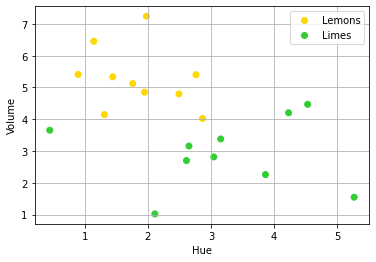

In [4]:
from matplotlib import pyplot as plt
from matplotlib import colors

def scatter_plot(data, labels, class_names, class_colors, marker_type):
    
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=class_colors, marker=marker_type)
    plt.legend(*scatter.legend_elements())
    plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
    plt.xlabel('Hue')
    plt.ylabel('Volume')
    plt.grid()

names = ['Lemons', 'Limes']
marker_type = "o"
colormap = colors.ListedColormap(['gold', 'limegreen'])

scatter_plot(X_train, y_train, names, colormap, marker_type)

### k Nearest Neighbors (k-NN) classification rule

Now suppose that we have a set of 5 new datapoints that we don't know to which class they belong. We call that the test set:

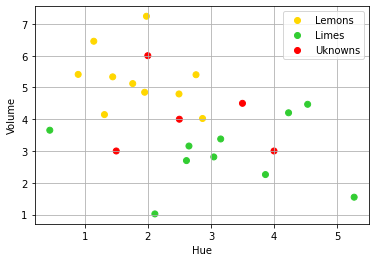

In [5]:
X_test = np.array([[1.5, 3.0], [2.0, 6.0], [3.5, 4.5], [4.0, 3.0], [2.5, 4.0]])
y_test = np.array([2, 2, 2, 2, 2]).T # label 2 means uknown, it's not a new class

names = ['Lemons', 'Limes', 'Uknowns']
marker_type="o"
colormap = colors.ListedColormap(['gold', 'limegreen', 'red'])

scatter_plot(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)),
             names, colormap, marker_type)

How do we decide if each of these new points is a lemon or a lime? How can we exploit the information our initial observations give us to make this decision?

An answer to the above, is the k Nearest Neighbors algorithm. The k-NN classification rule assigns a datapoint to the class most common among its k nearest neighbors.

*   "Nearest" is defined with respect to some distance metric, usually that is the euclidean distance, however other distances are more appropriate for some applications
*   k is a parameter chosen by the engineer, it is taken to be odd to avoid a situation where we can't decide because of a tie

In this exercise you will implement the k-NN rule, using the euclidean distance, to assign each datapoint from the test set to a class.

#### (a) Write a function that calculates the euclidean distance between two points:

In [17]:
def eucl_dist(a, b):

    return np.sum((a-b) ** 2) ** (1/2)

#### (b) Write a function that receives as arguments a point and the training set, and calculates the distance of that point from all the points of the training set. The function should return a vector of length equal to the number of points in the training set. You can opt to you use the previous function that you wrote or not.




In [18]:
def dist_from_training_set(a, X):

    return np.sum((X-a) ** 2, axis=1) ** (1/2)

In [22]:
A = np.array([2,4])
np.argmax(A)

1

#### (c) Write a function that receives as arguments a point, the training data, the training labels and an odd positive number k and implements that k-NN rule to assign the point into a class. The function should return the label assign to the point. 

In [37]:
def kNN(a, X, y, k):

    distances = dist_from_training_set(a, X)
    nn_indices = distances.argsort()[:k]
    nn_labels = y[nn_indices]
    nn_occurences = np.bincount(nn_labels)
    
    #print(nn_labels)
    #print(nn_occurences)
    #print(np.argmax(nn_occurences))
    
    return np.argmax(nn_occurences)

#### (d) Using the 3-NN rule assign a label to each point of the test set. Store the results in a NumPy vector.

In [21]:
n_test = X_test.shape[0]
y_pred_3NN = np.empty(n_test,).T


for idx in range(n_test):
    y_pred_3NN[idx] = kNN(X_test[idx], X_train, y_train, 3)

1
0
1
1
0


#### (e) Use sklearn's KNeighborsClassifier class to verify your result.



In [23]:
from sklearn.neighbors import KNeighborsClassifier

# using standard package implementation

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("User prediction : ", y_pred_3NN)
print("Package prediction : ", y_pred)

User prediction :  [1. 0. 1. 1. 0.]
Package prediction :  [1 0 1 1 0]


#### (f) Repeat (d) but now use the 1-NN and the 5-NN rules. You may use yours or sklearn's implementation of the kNN algorithm. What do you observe? 

In [38]:
y_pred_1NN, y_pred_5NN = np.empty(n_test,).T, np.empty(n_test,).T 


for idx in range(n_test):
    y_pred_1NN[idx] = kNN(X_test[idx], X_train, y_train, 1)
    y_pred_5NN[idx] = kNN(X_test[idx], X_train, y_train, 5)

print(y_pred_1NN, y_pred_3NN, y_pred_5NN)

[1. 0. 1. 1. 0.] [1. 0. 1. 1. 0.] [1. 0. 0. 1. 0.]


### Plotting classification results

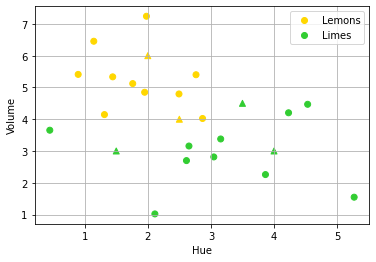

In [34]:
names_pred = ['Pred : 3NN']
colormap = colors.ListedColormap(['gold', 'limegreen'])
marker_test = "^"
scatter_plot(X_test, y_pred_3NN,None, colormap,marker_test)

names = ['Lemons', 'Limes']
colormap = colors.ListedColormap(['gold', 'limegreen'])
marker_train = "o"
scatter_plot(X_train,y_train,names, colormap, marker_train)

plt.grid()


### Accuracy - A classificiation performance metric

Now suppose that we know the ground truth labels for the examples in the test set. A metric for the performance of the classification algorithm is its accuracy which is defined as:

$$accuracy = \frac{\text{number of correct predictions}}{\text{total number of predictions}}$$

#### (g) Write a function that takes as arguments the ground truth labels and the predicted labels and outputs the classification accuracy. Use it to calculate the accuracy of the 3NN and 5NN rules on the test set.

In [35]:
y_test = np.array([1, 0, 0, 1, 0]).T # this is the ground truth

def accuracy(y_true, y_pred):
    n = y_true.shape[0]
    return np.sum(y_true == y_pred)/n

acc_3NN = accuracy(y_test, y_pred_3NN)
acc_5NN = accuracy(y_test, y_pred_5NN)

print(acc_3NN, acc_5NN)

0.8 1.0
